In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint seeingFWHMeff <= 0.8 and filter="u" for columns ['fieldRA', 'rotSkyPos', 'night', 'fieldDec']
Found 585 visits
Running:  ['good_seeing_v2_1_Nvis_seeingFWHMeff_lt_0_8_and_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint seeingFWHMeff <= 0.8 and filter="z" for columns ['fieldRA', 'rotSkyPos', 'night', 'fieldDec']
Found 107

0.0 180.0 -180.0 180.0


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="u"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:97: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="z"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 773 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="y"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 992 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="i"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 824 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="r"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 866 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="g"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 612 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 1007 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


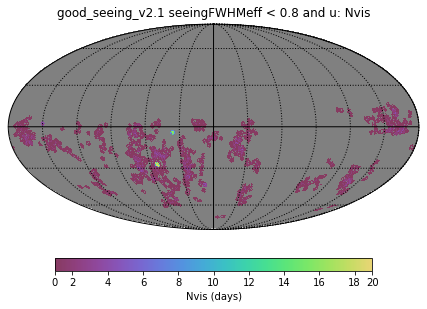

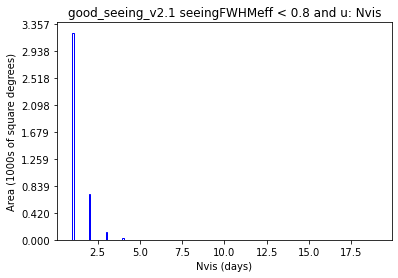

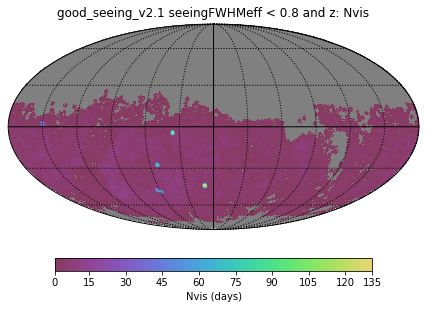

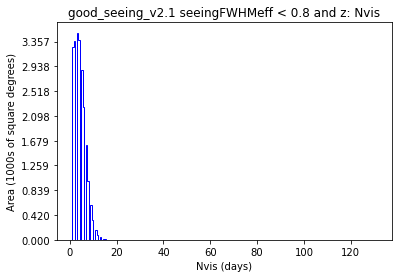

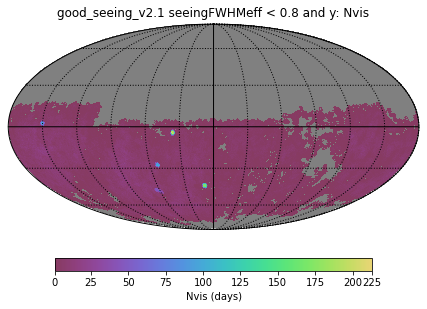

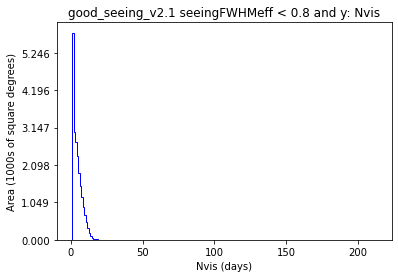

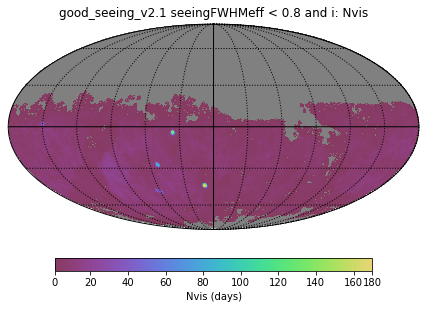

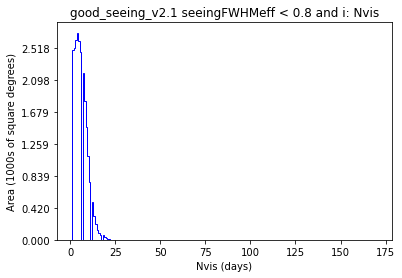

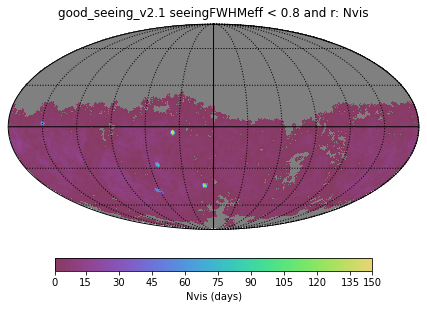

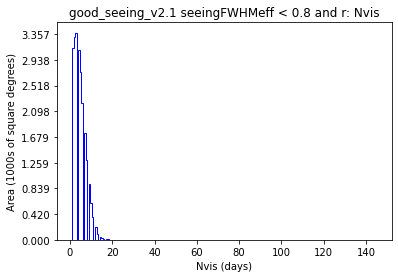

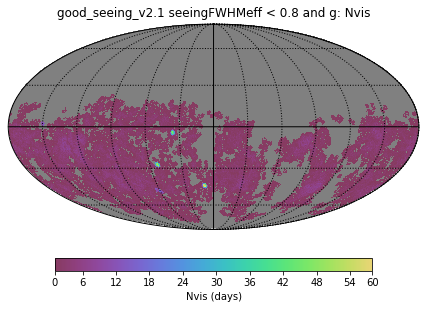

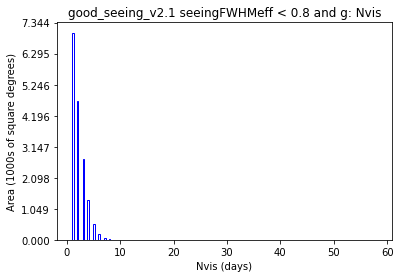

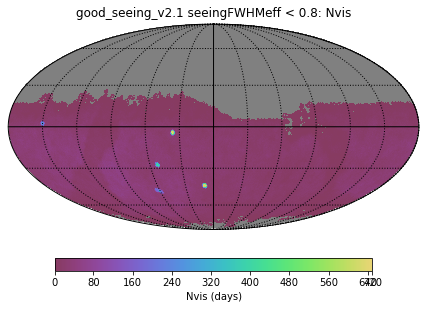

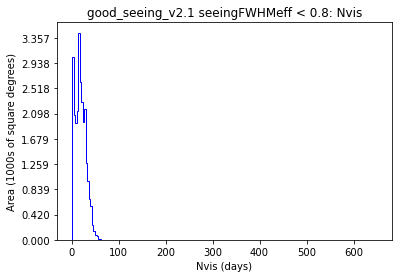

In [2]:
filename = 'good_seeing_v2.1_1yrs.db'
name = 'good_seeing_v2.1'
conn = maf.db.OpsimDatabase(filename)
outDir = 'gs'
resultsDb = maf.db.ResultsDb(outDir=outDir)
bundleList = []
sqls = ['seeingFWHMeff <= 0.8 and filter="%s"' % filtername for filtername in 'ugrizy']
sqls.append('seeingFWHMeff <= 0.8')
for sql in sqls:
    # col here could be anything
    metric = maf.metrics.CountMetric(col=['night'], metricName='Nvis')
    slicer = maf.slicers.HealpixSlicer()
    summary_stats = [maf.metrics.SumMetric()]
    #plotDict = {'colorMax': 950}
    plotDict = {}
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name,
                                       plotDict=plotDict, summaryMetrics=summary_stats))

bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)


In [6]:
for b in bundleList:
    print(b.constraint, b.summaryValues)

seeingFWHMeff <= 0.8 and filter="u" {'Sum': 25740.0}
seeingFWHMeff <= 0.8 and filter="g" {'Sum': 171567.0}
seeingFWHMeff <= 0.8 and filter="r" {'Sum': 527251.0}
seeingFWHMeff <= 0.8 and filter="i" {'Sum': 675749.0}
seeingFWHMeff <= 0.8 and filter="z" {'Sum': 468250.0}
seeingFWHMeff <= 0.8 and filter="y" {'Sum': 520280.0}
seeingFWHMeff <= 0.8 {'Sum': 2388837.0}


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint seeingFWHMeff <= 0.8 and filter="u" for columns ['fieldRA', 'rotSkyPos', 'night', 'fieldDec']
Found 1364 visits
Running:  ['baseline_v2_1_Nvis_seeingFWHMeff_lt_0_8_and_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint seeingFWHMeff <= 0.8 and filter="z" for columns ['fieldRA', 'rotSkyPos', 'night', 'fieldDec']
Found 11181

0.0 180.0 -180.0 180.0
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 257 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="z"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 777 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="y"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 888 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="i"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 865 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="r"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 1025 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8 and filter="g"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 1196 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "seeingFWHMeff <= 0.8" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 992 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


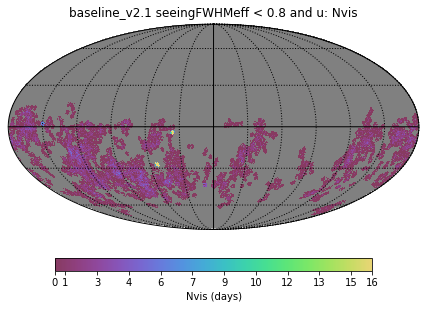

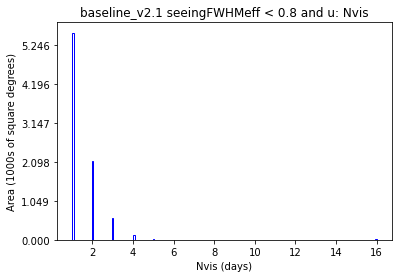

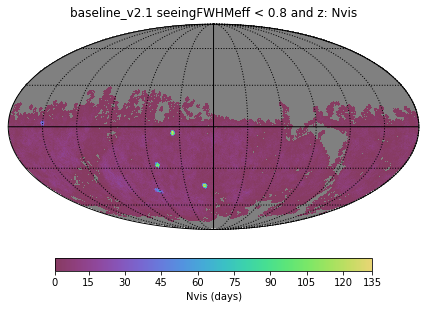

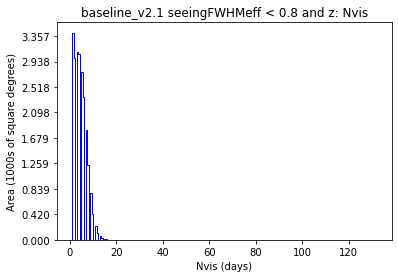

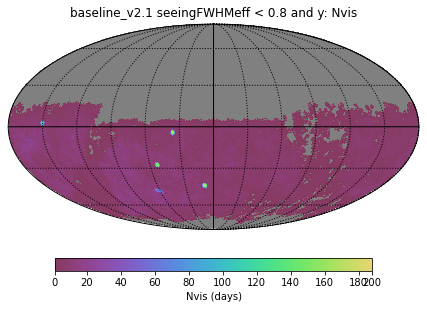

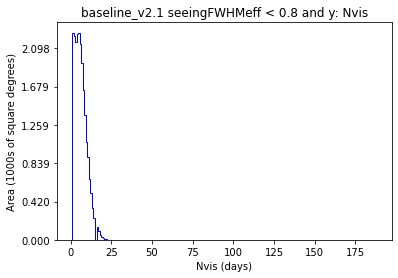

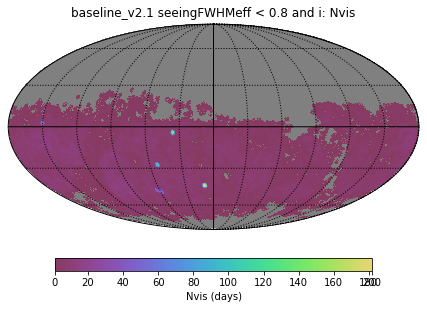

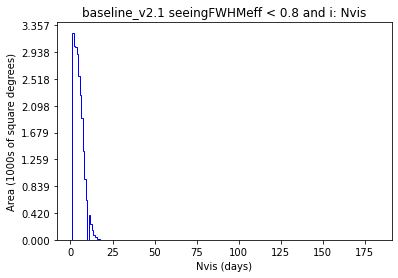

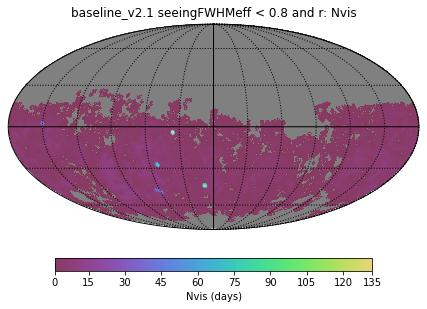

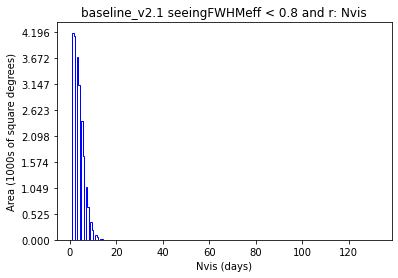

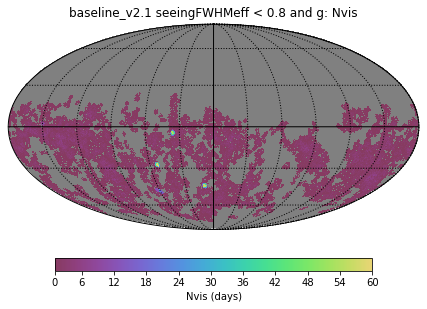

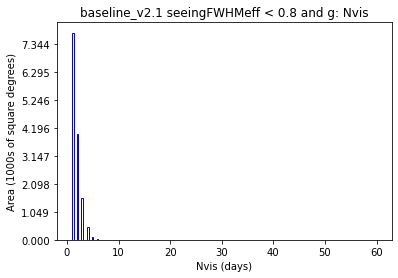

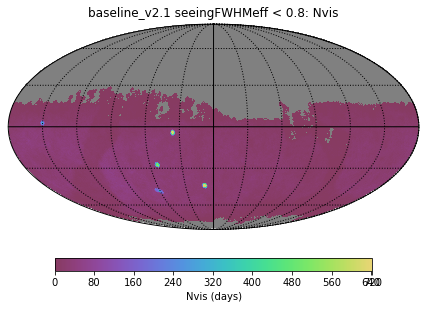

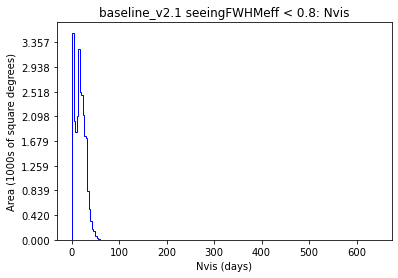

In [7]:
filename = 'baseline_v2.1_1yrs.db'
name = 'baseline_v2.1'
conn = maf.db.OpsimDatabase(filename)
outDir = 'baseline'
resultsDb = maf.db.ResultsDb(outDir=outDir)
bundleList = []
sqls = ['seeingFWHMeff <= 0.8 and filter="%s"' % filtername for filtername in 'ugrizy']
sqls.append('seeingFWHMeff <= 0.8')
for sql in sqls:
    # col here could be anything
    metric = maf.metrics.CountMetric(col=['night'], metricName='Nvis')
    slicer = maf.slicers.HealpixSlicer()
    summary_stats = [maf.metrics.SumMetric()]
    #plotDict = {'colorMax': 950}
    plotDict = {}
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name,
                                       plotDict=plotDict, summaryMetrics=summary_stats))

bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)


In [8]:
for b in bundleList:
    print(b.constraint, b.summaryValues)

seeingFWHMeff <= 0.8 and filter="u" {'Sum': 59743.0}
seeingFWHMeff <= 0.8 and filter="g" {'Sum': 118904.0}
seeingFWHMeff <= 0.8 and filter="r" {'Sum': 392104.0}
seeingFWHMeff <= 0.8 and filter="i" {'Sum': 535501.0}
seeingFWHMeff <= 0.8 and filter="z" {'Sum': 488187.0}
seeingFWHMeff <= 0.8 and filter="y" {'Sum': 679104.0}
seeingFWHMeff <= 0.8 {'Sum': 2273543.0}
